In [13]:
import pandas as pd
import numpy as np
import arrow
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [14]:
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [15]:
demo = pd.read_csv('Demo.csv', encoding = 'cp949')
tran = pd.read_csv('구매내역정보.csv', encoding = 'cp949', engine = 'python')

In [16]:
mg = pd.merge(demo, tran, on = 'ID')

In [17]:
mg.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,478207946,1,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0
1,478207946,1,84,서울 성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0
2,478207946,1,84,서울 성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0
3,478207946,1,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0
4,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0


In [18]:
mg['구매지역_광역']=[mg.구매지역[i].split()[0] for i in range(len(mg.구매지역))]

In [19]:
def season(x):
    if 5>=int(str(x)[4:6])>=3:
        return('봄')
    elif 8>=int(str(x)[4:6])>=6:
        return('여름')
    elif 11>=int(str(x)[4:6])>=9:
        return('가을')
    else:
        return('겨울')
    
mg['계절'] = mg.구매일자.apply(season)

In [20]:
shit = mg.groupby(['계절','상품대분류명']).구매수량.sum().reset_index()

In [21]:
shit.query('상품대분류명=="가구"')

,계절,상품대분류명,구매수량
0,가을,가구,152
7,겨울,가구,189
14,봄,가구,141
21,여름,가구,169


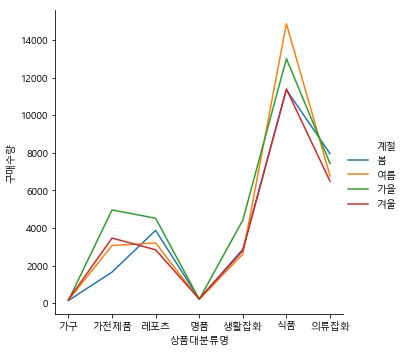

In [22]:
sns.relplot(x='상품대분류명', y='구매수량', hue = '계절', data = shit, hue_order=['봄','여름','가을','겨울'], kind = 'line')
plt.show()

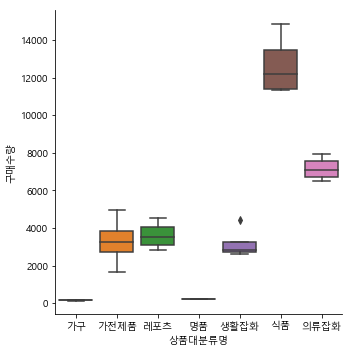

In [23]:
sns.catplot(x='상품대분류명', y='구매수량', data = shit, kind = 'box')
plt.show()

In [24]:
std1 = mg.groupby(['상품대분류명','계절'])['구매수량'].sum().reset_index()
std2 = pd.DataFrame()
std2['상품대분류명'] = shit.상품대분류명
std2['계절별표준편차'] = [np.std(std1.query('상품대분류명 == @i')['구매수량']) for i in shit.상품대분류명]
std2[:7]

,상품대분류명,계절별표준편차
0,가구,18.143525
1,가전제품,1176.549271
2,레포츠,642.842273
3,명품,12.328828
4,생활잡화,723.445402
5,식품,1439.838967
6,의류잡화,568.953590


In [25]:
np.std(std1.query('상품대분류명 == "가구"')['구매수량'])

18.14352501582865

In [26]:
mg = mg.drop(mg.query('구매금액 == 0').reset_index()['index'],axis=0) # 구매금액이 0원인 것 지움.

In [27]:
mg['평균금액'] = (mg['구매금액']/mg['구매수량']).astype(int)

In [28]:
mg = mg.drop(mg.query('평균금액 < 100').reset_index()['index'],axis = 0) # 평균금액 100원 미만 다 지움
mg = mg.drop(mg.query('평균금액 <= 200').reset_index()['index'], axis = 0) 
mg = mg.drop(mg[mg.평균금액.apply(lambda x: str(x)[-1]) != "0"].reset_index()['index'], axis = 0)
mg = mg.reset_index().drop('index', axis=1)
mg.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매지역_광역,계절,평균금액
0,478207946,1,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0,서울,겨울,59000
1,478207946,1,84,서울 성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0,서울,가을,106000
2,478207946,1,84,서울 성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0,서울,여름,37000
3,478207946,1,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0,서울,봄,118000
4,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0,서울,여름,22000


In [29]:
mg[mg.평균금액.apply(lambda x: str(x)[-1]) != "0"]

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매지역_광역,계절,평균금액


In [31]:
mg.shape

(100076, 15)

In [32]:
mg.to_csv('merging_data.csv')
mg

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매지역_광역,계절,평균금액
0,478207946,1,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0,서울,겨울,59000
1,478207946,1,84,서울 성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0,서울,가을,106000
2,478207946,1,84,서울 성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0,서울,여름,37000
3,478207946,1,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0,서울,봄,118000
4,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0,서울,여름,22000
5,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,26000,0,서울,여름,26000
6,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,53000,0,서울,여름,53000
7,479806984,1,84,서울 서초구,가전제품,생활가전,서울 송파구,20141218,13,1,120000,0,서울,겨울,120000
8,479806984,1,84,서울 서초구,가전제품,생활가전,서울 중구,20140607,14,1,97000,0,서울,여름,97000
9,94790213,1,84,부산 사상구,생활잡화,생활용품,부산 부산진구,20140714,14,1,12000,0,부산,여름,12000
